In [ ]:

#hello this is test change
# Load required pacakges
import pandas as pd

dataset = "../TEAM13_F1_DATASET"

#Load the datasets
circuits       = pd.read_csv(f"{dataset}/CIRCUITS.csv")
c_results      = pd.read_csv(f"{dataset}/CONSTRUCTOR_RESULTS.csv")
c_standings    = pd.read_csv(f"{dataset}/CONSTRUCTOR_STANDINGS.csv")
constructors   = pd.read_csv(f"{dataset}/CONSTRUCTORS.csv")
d_standings    = pd.read_csv(f"{dataset}/DRIVER_STANDINGS.csv")
drivers        = pd.read_csv(f"{dataset}/DRIVERS.csv")
lap_times      = pd.read_csv(f"{dataset}/LAP_TIMES.csv")
pit_stops      = pd.read_csv(f"{dataset}/PIT_STOPS.csv")
qualifying     = pd.read_csv(f"{dataset}/QUALIFYING.csv")
races          = pd.read_csv(f"{dataset}/RACES.csv")
results        = pd.read_csv(f"{dataset}/RESULTS.csv")
seasons        = pd.read_csv(f"{dataset}/SEASONS.csv")
sprint_results = pd.read_csv(f"{dataset}/SPRINT_RESULTS.csv")
status         = pd.read_csv(f"{dataset}/STATUS.csv")

datasets = [
    circuits,
    c_results,
    c_standings,
    constructors,
    d_standings,
    drivers,
    lap_times,
    pit_stops,
    qualifying,
    races,
    results,
    seasons,
    sprint_results,
    status
]

for d in datasets:
    print(f"Columns: {d.columns.tolist()}")

Columns: ['CIRCUITID', 'CIRCUITREF', 'NAME', 'LOCATION', 'COUNTRY', 'LAT', 'LNG', 'ALT', 'URL']
Columns: ['CONSTRUCTORRESULTSID', 'RACEID', 'CONSTRUCTORID', 'POINTS', 'STATUS']
Columns: ['CONSTRUCTORSTANDINGSID', 'RACEID', 'CONSTRUCTORID', 'POINTS', 'POSITION', 'POSITIONTEXT', 'WINS']
Columns: ['CONSTRUCTORID', 'CONSTRUCTORREF', 'NAME', 'NATIONALITY', 'URL']
Columns: ['DRIVERSTANDINGSID', 'RACEID', 'DRIVERID', 'POINTS', 'POSITION', 'POSITIONTEXT', 'WINS']
Columns: ['DRIVERID', 'DRIVERREF', 'NUMBER', 'CODE', 'FORENAME', 'SURNAME', 'DOB', 'NATIONALITY', 'URL']
Columns: ['RACEID', 'DRIVERID', 'LAP', 'POSITION', 'TIME', 'MILLISECONDS']
Columns: ['RACEID', 'DRIVERID', 'STOP', 'LAP', 'TIME', 'DURATION', 'MILLISECONDS']
Columns: ['QUALIFYID', 'RACEID', 'DRIVERID', 'CONSTRUCTORID', 'NUMBER', 'POSITION', 'Q1', 'Q2', 'Q3']
Columns: ['RACEID', 'YEAR', 'ROUND', 'CIRCUITID', 'NAME', 'DATE', 'TIME', 'URL', 'FP1_DATE', 'FP1_TIME', 'FP2_DATE', 'FP2_TIME', 'FP3_DATE', 'FP3_TIME', 'QUALI_DATE', 'QUALI_T

In [23]:
#Remove floats
results["POINTS"] = results["POINTS"].astype(int)


In [72]:
#Choose 2010 - 2024 data (modern points system)
rr = pd.merge(results, races, on="RACEID")
print(rr.columns.tolist())
rr_df = rr[rr['YEAR'] >= 2010]


rr_df = rr_df.sort_values(['YEAR'], ascending=[1])
print(rr_df.head())

['RESULTID', 'RACEID', 'DRIVERID', 'CONSTRUCTORID', 'NUMBER', 'GRID', 'POSITION', 'POSITIONTEXT', 'POSITIONORDER', 'POINTS', 'LAPS', 'TIME_x', 'MILLISECONDS', 'FASTESTLAP', 'RANK', 'FASTESTLAPTIME', 'FASTESTLAPSPEED', 'STATUSID', 'YEAR', 'ROUND', 'CIRCUITID', 'NAME', 'DATE', 'TIME_y', 'URL', 'FP1_DATE', 'FP1_TIME', 'FP2_DATE', 'FP2_TIME', 'FP3_DATE', 'FP3_TIME', 'QUALI_DATE', 'QUALI_TIME', 'SPRINT_DATE', 'SPRINT_TIME']
       RESULTID  RACEID  DRIVERID  CONSTRUCTORID  NUMBER  GRID  POSITION  \
20331     20334     337        16             10    14.0    10      12.0   
20330     20333     337         9              4    11.0     9      11.0   
20329     20332     337        22              3     9.0    11      10.0   
20328     20331     337        24             10    15.0    12       9.0   
20327     20330     337        17              9     6.0     6       8.0   

      POSITIONTEXT  POSITIONORDER  POINTS  ...  FP1_DATE FP1_TIME  FP2_DATE  \
20331           12             12       0

In [100]:
#Fastest Driver
fastest_driver = rr_df.groupby('DRIVERID').agg(
    TPOI=pd.NamedAgg(column='POINTS', aggfunc='sum'),
    MPOS=pd.NamedAgg(column='POSITIONORDER', aggfunc='sum'),
    TRAC=pd.NamedAgg(column='RACEID', aggfunc='nunique'),
).reset_index()

fastest_driver['MPOI'] = fastest_driver['TPOI'] / fastest_driver['TRAC']
fastest_driver['MPOS'] =  fastest_driver['MPOS'] / fastest_driver['TRAC']
fastest_driver = fastest_driver.sort_values(['MPOS'], ascending=[1])
fastest_driver = pd.merge(fastest_driver, drivers, on='DRIVERID')
print(fastest_driver.head(20))

    DRIVERID  TPOI       MPOS  TRAC       MPOI       DRIVERREF  NUMBER CODE  \
0          1  4564   4.805921   304  15.013158        hamilton    44.0  HAM   
1        830  2912   5.645933   209  13.933014  max_verstappen    33.0  VER   
2         17   878   6.259740    77  11.402597          webber     NaN  WEB   
3         20  2973   6.540856   257  11.568093          vettel     5.0  VET   
4          3  1519   6.683824   136  11.169118         rosberg     6.0  ROS   
5        844  1363   7.557047   149   9.147651         leclerc    16.0  LEC   
6        846   950   7.851562   128   7.421875          norris     4.0  NOR   
7        857   347   7.891304    46   7.543478         piastri    81.0  PIA   
8          8  1294   8.769231   195   6.635897       raikkonen     7.0  RAI   
9        822  1788   8.967611   247   7.238866          bottas    77.0  BOT   
10         4  1752   9.075758   264   6.636364          alonso    14.0  ALO   
11        13   847   9.251613   155   5.464516      

In [ ]:
#Fastest Constructor
fastest_constructor = rr_df.groupby('CONSTRUCTORID').agg(
    total_points=pd.NamedAgg(column='POINTS', aggfunc='sum'),
    total_races=pd.NamedAgg(column='RACEID', aggfunc='nunique'),
).reset_index()

fastest_constructor['MEAN POINTS'] = fastest_constructor['total_points'] / fastest_constructor['total_races']
fastest_constructor = fastest_constructor.sort_values(['MEAN POINTS'], ascending=[0])
fastest_constructor = pd.merge(fastest_constructor, constructors, on='CONSTRUCTORID')
print(fastest_constructor.head(20))

    CONSTRUCTORID  total_points  total_races  MEAN POINTS CONSTRUCTORREF  \
0             131          7591          305    24.888525       mercedes   
1               9          7416          305    24.314754       red_bull   
2               6          6094          305    19.980328        ferrari   
3               1          3473          305    11.386885        mclaren   
4             208           706           77     9.168831       lotus_f1   
5             211           283           38     7.447368   racing_point   
6              10          1085          177     6.129944    force_india   
7             214           498           90     5.533333         alpine   
8             117           492           90     5.466667   aston_martin   
9               4           695          138     5.036232        renault   
10            213           306           83     3.686747     alphatauri   
11              3          1035          305     3.393443       williams   
12          

C:\Users\katrina.tang\AppData\Local\Temp\ipykernel_29104\1266797467.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


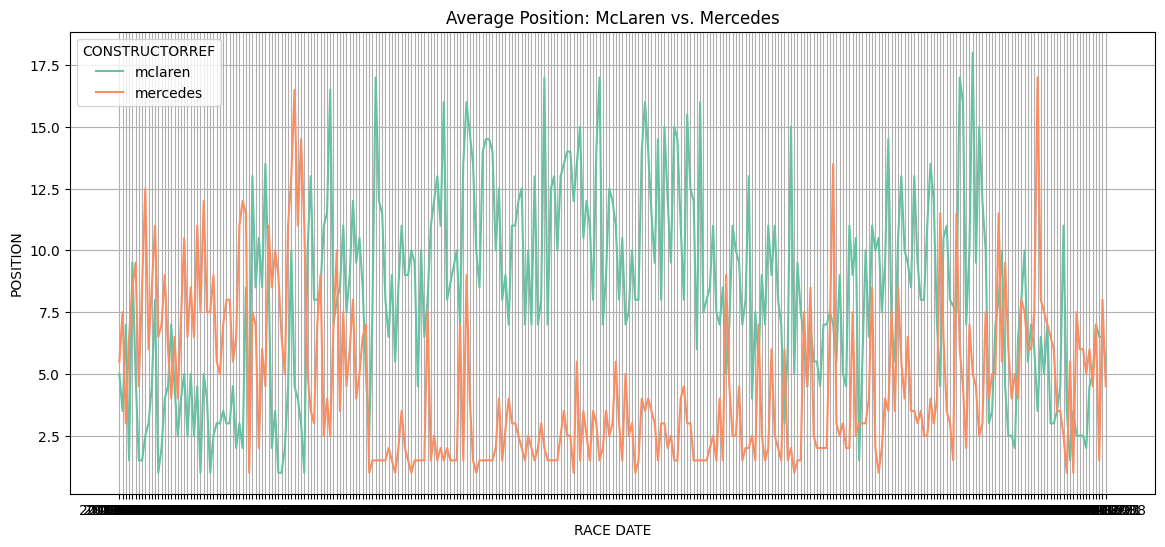

In [133]:
#aggregate by constructor team 2010 - 2024
import matplotlib.pyplot as plt
import seaborn as sns

merge = pd.merge(results, constructors, on='CONSTRUCTORID')
merge2 = pd.merge(merge, races, on='RACEID')
#print(merge2.head(50)[['RESULTID', 'RACEID', 'CONSTRUCTORREF', 'POSITION', 'DATE']])

merge2_cleaned = merge2[merge2['CONSTRUCTORREF'].isin(['mclaren', 'mercedes'])]
merge2_cleaned = merge2_cleaned[merge2_cleaned['YEAR'] >= 2010]

plt.figure(figsize=(14, 6))
sns.lineplot(
    data=merge2_cleaned,
    x='DATE',
    y='POSITION',
    hue='CONSTRUCTORREF',
    estimator='mean',
    ci=None,
    palette='Set2'
)
plt.title('Average Position: McLaren vs. Mercedes')
plt.xlabel('RACE DATE')
plt.ylabel('POSITION')
plt.grid(True)
plt.show()
#sub = merge[['CONSTRUCTORREF', 'RACEID', 'YEAR', 'POSITION']]
#print(sub.head())